In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade certifi

!pip install --trusted-host files.pythonhosted.org optuna



In [11]:
os.listdir()

['.config', 'fraudTrain.csv', 'fraudTest.csv', 'sample_data']

In [12]:
data=pd.read_csv("fraudTrain.csv")

In [13]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62251,62251,2019-02-05 23:59:58,4412720572684931,"fraud_Schiller, Blanda and Johnson",home,53.37,Richard,Marshall,M,295 Page Creek Suite 181,...,37.7681,-75.6664,776,Psychiatrist,1949-11-17,a117142e505c928f60a44617a8cb9212,1.328486e+09,38.614949,-75.269499,0.0
62252,62252,2019-02-06 00:00:06,4797297220948468262,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,40.56,Erica,Briggs,F,3310 Davidson Spurs Apt. 107,...,38.8938,-86.5246,1228,Counsellor,1991-03-13,56885314e534602c2ab8bed2ef237d4c,1.328486e+09,39.665993,-86.739559,0.0
62253,62253,2019-02-06 00:02:54,6011366578560244,"fraud_Raynor, Feest and Miller",gas_transport,81.50,Adam,Stark,M,0912 Mark Fields Apt. 080,...,40.5046,-77.7186,4653,Nutritional therapist,1997-07-01,3f47a9d378a07b15da283f43161467ea,1.328487e+09,40.871729,-78.688515,0.0
62254,62254,2019-02-06 00:06:43,4239436242473,"fraud_Christiansen, Goyette and Schamberger",gas_transport,56.49,James,Leon,M,826 Benjamin Stravenue,...,38.8320,-77.1200,321490,"Scientist, biomedical",1991-10-04,9d1b8a7a381971e57123f3c8fda06b73,1.328487e+09,38.953980,-77.185126,0.0


In [14]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,62256.000000,6.225600e+04,62256.000000,62256.000000,62256.000000,62256.000000,6.225600e+04,6.225500e+04,62255.000000,62255.000000,62255.000000
mean,31127.500000,4.233146e+17,71.536326,48664.939652,38.528040,-90.178475,8.966283e+04,1.326963e+09,38.527326,-90.181012,0.009317
std,17971.903516,1.317530e+18,152.861065,26948.620604,5.083055,13.841213,3.022644e+05,9.112453e+05,5.115928,13.854678,0.096072
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.670132,0.000000
25%,15563.750000,1.800429e+14,9.690000,25526.000000,34.620500,-96.786900,7.430000e+02,1.326153e+09,34.741722,-96.857540,0.000000
50%,31127.500000,3.519607e+15,47.860000,48088.000000,39.354300,-87.456900,2.463500e+03,1.326990e+09,39.355193,-87.376260,0.000000
75%,46691.250000,4.642255e+15,83.520000,72011.000000,41.846700,-80.124800,2.112500e+04,1.327761e+09,41.918787,-80.148977,0.000000
max,62255.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.328487e+09,66.659242,-66.967742,1.000000


In [16]:
data.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,62256,62256,62256,62256,62256,62256,62256,62256,62256,62256,62256,62256
unique,61530,693,14,338,467,2,914,840,50,476,900,62256
top,2019-01-27 23:36:02,fraud_Cormier LLC,gas_transport,Christopher,Smith,F,72269 Elizabeth Field Apt. 132,Phoenix,TX,Exhibition designer,1977-03-23,0b242abb623afc578575680df30655b9
freq,3,208,6230,1315,1337,34084,179,265,4552,452,245,1


In [17]:
train_df = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num','first', 'last','trans_num', 'unix_time'],axis=1)
test_df = pd.read_csv('fraudTest.csv')

In [18]:
train_df['distance']= (train_df['lat'] - train_df['merch_lat'])**2 + (train_df['long'] - train_df['merch_long'])**2

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english') and not word.isdigit()])
    return text

# Apply cleaning to relevant columns
train_df['merchant'] = train_df['merchant'].apply(clean_text)
train_df['category'] = train_df['category'].apply(clean_text)
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

In [21]:
from datetime import datetime

# Function to calculate age
def calculate_age(dob):
    today = datetime.today()
    dob = datetime.strptime(dob, '%Y-%m-%d')
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the 'dob' column
train_df['age'] = train_df['dob'].apply(calculate_age)


In [22]:
categorical_columns = ['category', 'gender', 'job','city','state','merchant','street','city_state']
for column in categorical_columns:
    train_df[column] = train_df[column].astype('category')

In [23]:
train_df

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,distance,city_state,age
0,fraud_rippin kub mann,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0,0.761831,Moravian Falls_NC,36
1,fraud_heller gutmann zieme,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0,0.074153,Orient_WA,46
2,fraud_lindbuckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0,0.952274,Malad City_ID,62
3,fraud_kutch hermiston farrell,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0.0,0.846035,Boulder_MT,57
4,fraud_keelingcrist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0,0.754300,Doe Hill_VA,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62251,fraud_schiller blanda johnson,home,53.37,M,295 Page Creek Suite 181,Greenbush,VA,23357,37.7681,-75.6664,776,Psychiatrist,1949-11-17,38.614949,-75.269499,0.0,0.874684,Greenbush_VA,75
62252,fraud_eichmann bogan rodriguez,gas_transport,40.56,F,3310 Davidson Spurs Apt. 107,Oolitic,IN,47451,38.8938,-86.5246,1228,Counsellor,1991-03-13,39.665993,-86.739559,0.0,0.642489,Oolitic_IN,33
62253,fraud_raynor feest miller,gas_transport,81.50,M,0912 Mark Fields Apt. 080,Mc Veytown,PA,17051,40.5046,-77.7186,4653,Nutritional therapist,1997-07-01,40.871729,-78.688515,0.0,1.075519,Mc Veytown_PA,27
62254,fraud_christiansen goyette schamberger,gas_transport,56.49,M,826 Benjamin Stravenue,Alexandria,VA,22311,38.8320,-77.1200,321490,"Scientist, biomedical",1991-10-04,38.953980,-77.185126,0.0,0.019121,Alexandria_VA,33


In [24]:
train_df.dtypes

,0
merchant,category
category,category
amt,float64
gender,category
street,category
city,category
state,category
zip,int64
lat,float64
long,float64


In [25]:
import networkx as nx

G = nx.Graph()

# Add nodes and edges based on the data
for index, row in data.iterrows():
    trans_id = f'trans_{index}'
    G.add_node(trans_id, label='transaction')
    G.add_node(row['merchant'], label='merchant')
    G.add_node(row['category'], label='category')
    G.add_node(row['city'], label='city')
    G.add_node(row['state'], label='state')
    G.add_edge(trans_id, row['merchant'], relationship='made_at')
    G.add_edge(trans_id, row['category'], relationship='belongs_to')
    G.add_edge(trans_id, row['city'], relationship='located_in')
    G.add_edge(trans_id, row['state'], relationship='in')
    G.add_node(row['job'], label='job')
    G.add_edge(trans_id, row['job'], relationship='job')

In [26]:
train_df.drop(['merch_lat', 'merch_long','lat', 'long'],axis=1,inplace=True)

In [27]:
train_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'city_pop', 'job', 'dob', 'is_fraud', 'distance', 'city_state',
       'age'],
      dtype='object')

In [28]:
train_df.drop(['street','zip','city_pop'],axis=1,inplace=True)

In [29]:
train_df.drop(['dob'],axis=1,inplace=True)

In [30]:
train_df.to_csv("train_df_new.csv")

In [31]:
train_df=pd.read_csv("train_df_new.csv")
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [32]:
!pip install pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [33]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
from sklearn.model_selection import train_test_split
import torch
# Create triples for KG (subject, predicate, object)
triples = []
for index, row in train_df.iterrows():
    trans_id = f'trans_{index}'
    triples.append((trans_id, 'made_at', row['merchant']))
    triples.append((trans_id, 'belongs_to', row['category']))
    triples.append((trans_id, 'located_in', row['city']))
    triples.append((trans_id, 'in', row['state']))
    triples.append((trans_id, 'job', row['job']))
triples = np.array(triples)
# Create a PyKEEN dataset
for i in range(25):
    print(triples[i])

# Check data types of the triples
print(type(triples[0][0]), type(triples[0][1]), type(triples[0][2]))

# Remove malformed entries
valid_triples = [triple for triple in triples if len(triple) == 3]
triples = np.array(valid_triples)

# Split the triples into training and testing sets
train_triples, test_triples = train_test_split(triples, test_size=0.2, random_state=42)
train_triples=triples
# Create TriplesFactory objects for training and testing sets
train_tf = TriplesFactory.from_labeled_triples(train_triples)
test_tf = TriplesFactory.from_labeled_triples(test_triples)

# Print TriplesFactory details for debugging
print(train_tf)
print(test_tf)

# Train a KG embedding model with both training and testing triples factories
result = pipeline(
    training=train_tf,
    testing=test_tf,
    model='TransE',
    training_kwargs=dict(num_epochs=10),
)
all_entities = train_tf.entity_to_id
embeddings = result.model.entity_representations[0](indices=torch.arange(train_tf.num_entities, device=result.model.device)).cpu().detach().numpy()

# Create a DataFrame with embeddings
embedding_df = pd.DataFrame(embeddings, index=all_entities.keys())

# Merge embeddings with labels
train_df['embedding'] = train_df.index.map(lambda x: embedding_df.loc[f'trans_{x}'].values)

INFO:pykeen.utils:Using opt_einsum


['trans_0' 'made_at' 'fraud_rippin kub mann']
['trans_0' 'belongs_to' 'misc_net']
['trans_0' 'located_in' 'Moravian Falls']
['trans_0' 'in' 'NC']
['trans_0' 'job' 'Psychologist, counselling']
['trans_1' 'made_at' 'fraud_heller gutmann zieme']
['trans_1' 'belongs_to' 'grocery_pos']
['trans_1' 'located_in' 'Orient']
['trans_1' 'in' 'WA']
['trans_1' 'job' 'Special educational needs teacher']
['trans_2' 'made_at' 'fraud_lindbuckridge']
['trans_2' 'belongs_to' 'entertainment']
['trans_2' 'located_in' 'Malad City']
['trans_2' 'in' 'ID']
['trans_2' 'job' 'Nature conservation officer']
['trans_3' 'made_at' 'fraud_kutch hermiston farrell']
['trans_3' 'belongs_to' 'gas_transport']
['trans_3' 'located_in' 'Boulder']
['trans_3' 'in' 'MT']
['trans_3' 'job' 'Patent attorney']
['trans_4' 'made_at' 'fraud_keelingcrist']
['trans_4' 'belongs_to' 'misc_pos']
['trans_4' 'located_in' 'Doe Hill']
['trans_4' 'in' 'VA']
['trans_4' 'job' 'Dance movement psychotherapist']
<class 'numpy.str_'> <class 'numpy.str_

INFO:pykeen.pipeline.api:Using device: None


TriplesFactory(num_entities=64329, num_relations=5, create_inverse_triples=False, num_triples=311280)
TriplesFactory(num_entities=43908, num_relations=5, create_inverse_triples=False, num_triples=62256)


Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1216 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/62.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 45.53s seconds


In [34]:
!pip install python-louvain

from community import community_louvain

# Calculate the Louvain community structure
partition = community_louvain.best_partition(G)

# Add the community assignments to the dataframe
train_df['community'] = train_df.index.map(lambda x: partition.get(f'trans_{x}', -1))

# Print or further analyze the community assignments
print(train_df[['community']])

       community
0              3
1             33
2              9
3             10
4             37
...          ...
62251         37
62252         18
62253          6
62254         33
62255         42

[62256 rows x 1 columns]


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62256 entries, 0 to 62255
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    62256 non-null  object 
 1   category    62256 non-null  object 
 2   amt         62256 non-null  float64
 3   gender      62256 non-null  object 
 4   city        62256 non-null  object 
 5   state       62256 non-null  object 
 6   job         62256 non-null  object 
 7   is_fraud    62255 non-null  float64
 8   distance    62255 non-null  float64
 9   city_state  62256 non-null  object 
 10  age         62256 non-null  int64  
 11  embedding   62256 non-null  object 
 12  community   62256 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 6.2+ MB


In [36]:
train_df.dropna()

,merchant,category,amt,gender,city,state,job,is_fraud,distance,city_state,age,embedding,community
0,fraud_rippin kub mann,misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",0.0,0.761831,Moravian Falls_NC,36,"[0.1621294, 0.1789335, -0.018773621, 0.0464867...",3
1,fraud_heller gutmann zieme,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,0.0,0.074153,Orient_WA,46,"[0.20877345, -0.20360301, 0.1619441, 0.0219442...",33
2,fraud_lindbuckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,0.0,0.952274,Malad City_ID,62,"[-0.08117392, -0.11482736, -0.05732183, -0.089...",9
3,fraud_kutch hermiston farrell,gas_transport,45.00,M,Boulder,MT,Patent attorney,0.0,0.846035,Boulder_MT,57,"[-0.18413432, -0.20321298, 0.05580506, -0.1746...",10
4,fraud_keelingcrist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,0.0,0.754300,Doe Hill_VA,38,"[-0.10942581, 0.19651414, -0.11099254, -0.0230...",37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62250,fraud_reinger weissnat strosin,food_dining,8.30,M,Pikesville,MD,Company secretary,0.0,0.109866,Pikesville_MD,47,"[-0.13765618, 0.029626405, 0.029051138, 0.1810...",30
62251,fraud_schiller blanda johnson,home,53.37,M,Greenbush,VA,Psychiatrist,0.0,0.874684,Greenbush_VA,75,"[-0.018081214, 0.11187695, -0.23479047, 0.0433...",37
62252,fraud_eichmann bogan rodriguez,gas_transport,40.56,F,Oolitic,IN,Counsellor,0.0,0.642489,Oolitic_IN,33,"[0.25690755, -0.13831593, -0.17837875, -0.1385...",18
62253,fraud_raynor feest miller,gas_transport,81.50,M,Mc Veytown,PA,Nutritional therapist,0.0,1.075519,Mc Veytown_PA,27,"[-0.20517617, 0.11171352, 0.034405652, 0.04823...",6


In [37]:
for col in train_df.columns:
    if train_df[col].dtype == 'object' and col != 'embedding':  # Skip 'embedding' column
        train_df[col] = train_df[col].astype('category')

In [40]:
train_df=train_df.dropna()

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'gender' column in both training and validation data
train_df['gender_encoded'] = le.fit_transform(train_df['gender'])


X =  train_df[['amt', 'distance', 'age', 'gender_encoded','community']]
y = train_df['is_fraud']



classification report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12332
         1.0       0.76      0.54      0.63       119

    accuracy                           0.99     12451
   macro avg       0.88      0.77      0.81     12451
weighted avg       0.99      0.99      0.99     12451

confusion_matrix 
 [[12312    20]
 [   55    64]]


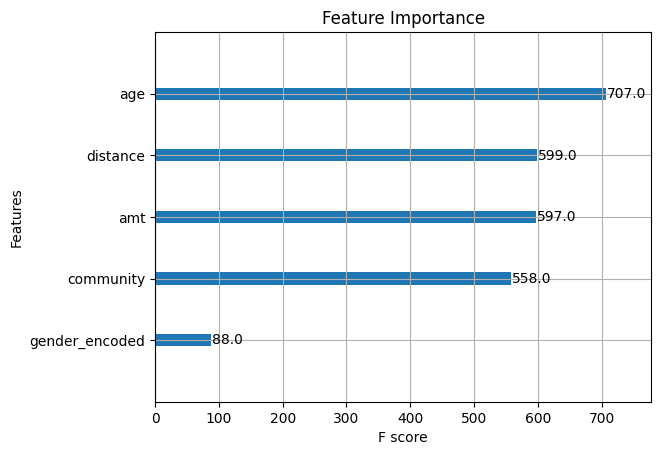

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


In [44]:
 y_train.value_counts()

,count
is_fraud,
0.0,49343
1.0,461


[0]	validation_0-auc:0.94615
[1]	validation_0-auc:0.95199
[2]	validation_0-auc:0.94903
[3]	validation_0-auc:0.93737
[4]	validation_0-auc:0.94094
[5]	validation_0-auc:0.94701
[6]	validation_0-auc:0.94742
classification report 
               precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     12332
         1.0       0.07      0.91      0.13       119

    accuracy                           0.88     12451
   macro avg       0.53      0.90      0.53     12451
weighted avg       0.99      0.88      0.93     12451

confusion_matrix 
 [[10908  1424]
 [   11   108]]


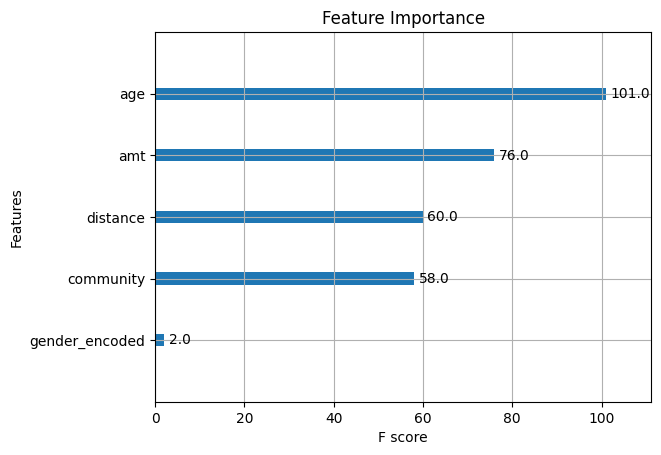

In [45]:
scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = xgb.XGBClassifier(early_stopping_rounds =5 ,eval_metric='auc', random_state=42,enable_categorical=True,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train,eval_set=[(X_val, y_val)])

y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


##### Use stacking

In [46]:
import lightgbm as lgbm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('lgbm',lgbm.LGBMClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, enable_categorical=True))
]


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [47]:
meta_learner = LogisticRegression()
!pip install scikit-learn==1.0.2
!pip install --upgrade xgboost
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


[LightGBM] [Info] Number of positive: 461, number of negative: 49343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 49804, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009256 -> initscore=-4.673153
[LightGBM] [Info] Start training from score -4.673153


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise a

[LightGBM] [Info] Number of positive: 369, number of negative: 39474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 39843, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009261 -> initscore=-4.672601
[LightGBM] [Info] Start training from score -4.672601


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


[LightGBM] [Info] Number of positive: 369, number of negative: 39474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 39843, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009261 -> initscore=-4.672601
[LightGBM] [Info] Start training from score -4.672601


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


[LightGBM] [Info] Number of positive: 369, number of negative: 39474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 39843, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009261 -> initscore=-4.672601
[LightGBM] [Info] Start training from score -4.672601


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


[LightGBM] [Info] Number of positive: 368, number of negative: 39475
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 39843, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009236 -> initscore=-4.675340
[LightGBM] [Info] Start training from score -4.675340


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


[LightGBM] [Info] Number of positive: 369, number of negative: 39475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 39844, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009261 -> initscore=-4.672626
[LightGBM] [Info] Start training from score -4.672626


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
#model = xgb.XGBClassifier(early_stopping_rounds=10, eval_metric='auc',enable_categorical=True)
#model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Make predictions on the validation set
y_val_pred = stacking_model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")
